# Hoework V - ME 364 (Spring 2022)

<font color='red'>__Question__</font>: Researchers at Massachusetts Institute of Technology have recently developed a dataset for the prupose of data-driven design of a bicycle. In the long run, the goal is to use this dataset to train models that are capable of desgning bicycles based on given features. In this homework assignment, we try to use KNN method to classify the type of a given bicycle using the given features. There is a great video giving explanations regarding these researchers' work at https://www.youtube.com/watch?v=75GpGV68VU, which I encourage you to watch to get a better understandng of the dataset. Further, you can also find their published paper at https://decode.mit.edu/assets/papers/BIKED.pdf. Both the video and the paper provide information about how did they create the dataset and some of their modeling results.

This dataset includes 4512 manually-designed bicycle models span all common bicycle styles and feature unique models from remote corners of the bicycle design space. BIKED contains user-specified bicycle class data. Shown below is a plot of the parametric bicycle design space. Corresponding images from models in different regions of the embedding are showcased.

<img src="https://docs.google.com/uc?export=download&id=1tKmeqGxrdxBfI3LyoyBtXZe9CGvU-wZ8" width="800">



__(a)__ Import the dataset and print the first five rows, which comes as a csv file with this assignment. How many rows do we have in this dataset?

In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Homework%205/Biked_Dataset_Reduced.csv"
df = pd.read_csv(url)

# Get number of rows
n = len(df.index)
print(f"Number of rows in dataset: {n}")

# Display first 5 rows of dataset
display(df.head(5))

Number of rows in dataset: 4512


,SSSIDECX3,SSSIDECX2,SSSIDECX1,SSSIDECY2,SSSIDECY1,STEMBENDS,FRONTROTORBOLTS,Shoe up angle,Down tube front diameter,LRTHICK,...,Top tube type OHCLASS: 1,BRAZEonFDTYPE OHCLASS: FD9000F,BRAZEonFDTYPE OHCLASS: FD9070F,CSAUX3_MM_RATIO OHCLASS: 0,CSAUX3_MM_RATIO OHCLASS: 1,bottle SEATTUBE0 show OHCLASS: False,bottle SEATTUBE0 show OHCLASS: True,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,Bicycle_Model
0,0.115968,0.213580,0.240722,0.173913,0.295455,0.0,0.75,0.906475,0.323077,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,ROAD
1,0.115968,0.171084,0.199779,0.173913,0.295455,0.0,0.75,0.906475,0.293077,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,DIRT_JUMP
2,0.115968,0.267053,0.292434,0.173913,0.295455,0.0,0.75,0.899281,0.246154,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,POLO
3,0.115968,0.215305,0.242409,0.173913,0.295455,0.0,0.75,0.899281,0.246154,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,ROAD
4,0.115968,0.233025,0.259668,0.173913,0.295455,0.0,0.75,0.906475,0.293077,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,DIRT_JUMP


__(b)__ Print a list of all the unique styles in the dataset. 
The styles are identified as `Bicycle_Model` variable. How many different type of styles do we have in this dataset?

In [22]:
models = pd.unique(df['Bicycle_Model'])
print(f"Number of unique Bicycle_Model values: {len(models)}")
print(*models,sep='\n')

Number of unique Bicycle_Model values: 19
ROAD
DIRT_JUMP
POLO
BMX
MTB
TOURING
TRACK
CRUISER
COMMUTER
CITY
CYCLOCROSS
OTHER
TRIALS
CHILDRENS
TIMETRIAL
CARGO
HYBRID
GRAVEL
FAT


__(c)__ Is the data balanced in terms of bicycle styles (models)? Which style has the most number of samples in the dataset? Which style has the least? How many of each style do we have?

As shown in the histogram below, the distribution of samples across
different bicycle styles is highly imbalanced, with styles ranging from
FAT, with just a single entry, to ROAD, with nearly 2000 entries.

Most common model: ROAD, 1856
Least common model: FAT, 1


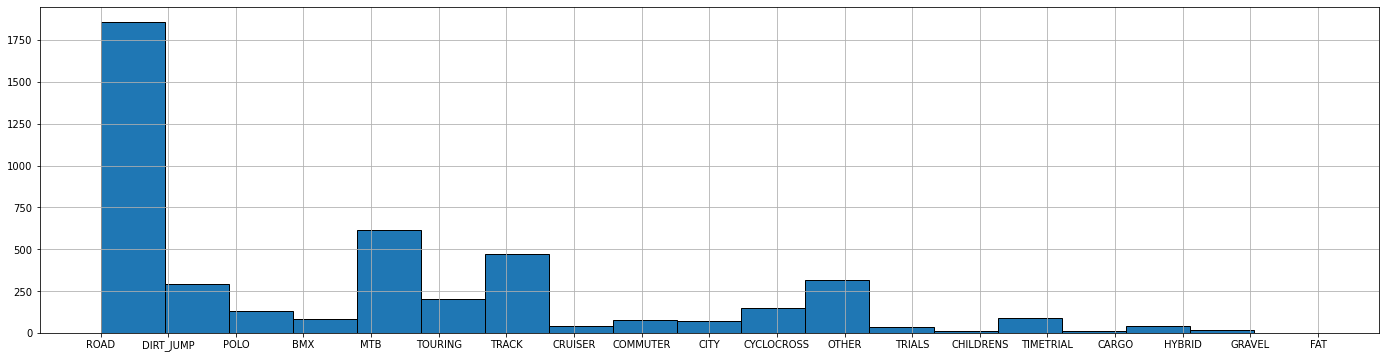

In [23]:
# Count number of occurences of each bicycle model
model_count = df['Bicycle_Model'].value_counts().sort_values()
print(f"Most common model: {model_count.idxmax()}, {model_count.max()}")
print(f"Least common model: {model_count.idxmin()}, {model_count.min()}")
fig = df['Bicycle_Model'].hist(figsize=(24,6),bins=len(model_count),edgecolor='k')

__(d)__ Use all the features given in the dataset to develop a model for classifying the three most common bike styles. Select a value for K for now. We are not looking for the most accurate model possible at this time.


Selected automatically in the code below, the three most common bike
styles are ROAD, MTB, and TRACK. The selected K-value is 4.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np

# New Dataframe containing only the three most common bike styles
df_top3 = df[df['Bicycle_Model'].isin(model_count.nlargest(3).index)]

# Set Bicycle_Model as target and all other columns as features
x_data = np.array(df_top3.loc[:, df.columns != 'Bicycle_Model'])
y_data = df_top3['Bicycle_Model']

# Normalize feature variables
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.25)

# Create KNN classifier
neigh = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')

# Train KNN classifier
neigh.fit(x_train,y_train)

# Make KNN predictions for both train and test datasets
yhatTest = neigh.predict(x_test)
yhatTrain= neigh.predict(x_train)

__(e)__ Use evaluation metrics we covered in class (Jaccard Index and F-Score) to assess the performance of the model. Provide the confusion matrix for both training and test data. Provide a few lines explanations about the performance of your model based on the results of evaluation metrics and confusion matrices.

Per the metrics below, this KNN model (with K=4) performed nearly as
well on the testing data as it did on the training data. Both the
Jaccard index and F-score are pretty good, though not perfect.

Nearly 98% of road bikes were categorized correlty, though this is
expected since it is by far the most common category. By contrast, the
least common of the three categories, track bikes, was identified less
than 55% of the time. The third category, was in between the other two
with respect to both overall size and how often it was correctly
identified, nearly 85% of the time. (Note that percentages are recorded
based on the first time I ran the program. Results have varied somewhat
in subsequent runs, but are similar enough that the analysis stands.)

Though far closer in size to the track bike category than to the road
bike category, mountain bike categorization was relatively effective,
perhaps because mountain bikes are more physically distinct from road
and track bikes than road and track bikes are from each other.

Jaccard index for training data: 0.783
Jaccard index for testing data: 0.686
F-score for training data is 0.879
F-score for testing data is 0.814


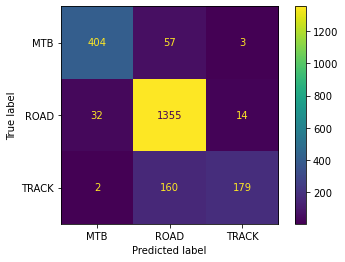

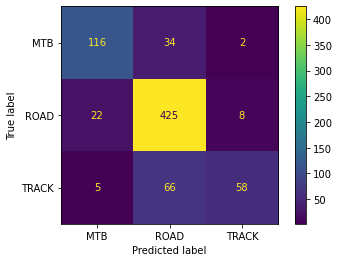

In [25]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate Jaccard index
J_scoreTrain = jaccard_score(y_train,yhatTrain, average='micro')
J_scoreTest = jaccard_score(y_test,yhatTest, average='micro')
print(f'Jaccard index for training data: {J_scoreTrain:0.3f}')
print(f'Jaccard index for testing data: {J_scoreTest:.3f}')

# Calculate F-score
F_scoreTrain = f1_score(y_train,yhatTrain, average='micro')
F_scoreTest = f1_score(y_test,yhatTest, average='micro')
print(f'F-score for training data is {F_scoreTrain:0.3f}')
print(f'F-score for testing data is {F_scoreTest:0.3f}')

# Plot confusion matrices
CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
dispTr=ConfusionMatrixDisplay(CM_scoreTrain, display_labels=neigh.classes_)
dispTr.plot();

CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'
dispTs=ConfusionMatrixDisplay(CM_scoreTest, display_labels=neigh.classes_) 
dispTs.plot();

__(f)__ Write a code that develops KNN models for K values from 1 to 20. Provide plots of Jaccard index and F-Score for all the models. Which K value would you choose if you had this information when developing the model for part (d) ?

Per the results of the code below, the best K-value for this classifier
is K=1. This result was consistent across multiple runs of the program
with different, randomly generated test/train data splits. This
conclusion is based solely on the performance of the classifier on the
testing data, not on the training data, though that information is also
shown below. Therfore, when developing the model in the sections above,
K=1 would have been a better selection than K=4.

It is worth noting that the perfect performance of the model on the
training data when K=1 can be ignored because the closest neighbor to
any data point in the training set will be itself, so the model will be
correct 100% of the time on the training data when K=1.

Best K-value by Jaccard index: 1
Best K-value by F-score: 1


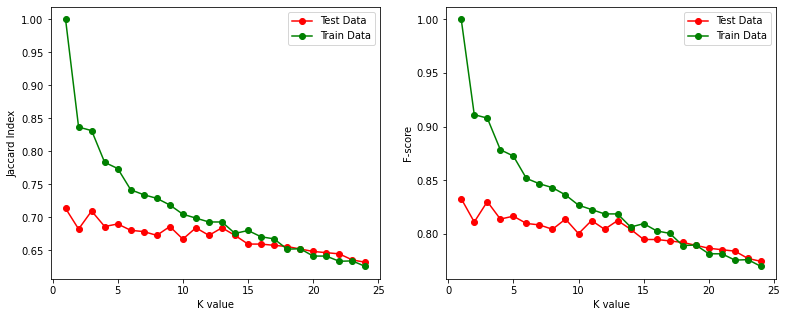

In [26]:
import matplotlib.pyplot as plt

Ks = 25
Jacc_Test = np.zeros((Ks-1))
Jacc_Train= np.zeros((Ks-1))

F_Loop_Test = np.zeros((Ks-1))
F_Loop_Train= np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neighLoop = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatTestLoop  = neighLoop.predict(x_test)
    yhatTrainLoop = neighLoop.predict(x_train)
    Jacc_Test[n-1] = jaccard_score(y_test, yhatTestLoop, average='micro')
    Jacc_Train[n-1] = jaccard_score(y_train, yhatTrainLoop, average='micro')

    F_Loop_Test[n-1] = f1_score(y_test, yhatTestLoop, average='micro')
    F_Loop_Train[n-1] = f1_score(y_train, yhatTrainLoop, average='micro')

# Get best K-value per each metric, excluding K=1
best_J = np.argmax(Jacc_Train)+1
print(f"Best K-value by Jaccard index: {best_J}")
best_F = np.argmax(F_Loop_Train)+1
print(f"Best K-value by F-score: {best_F}")

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(range(1,Ks),Jacc_Test,'r-o',range(1,Ks),Jacc_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Jaccard Index');

plt.subplot(1,2,2)
plt.plot(range(1,Ks),F_Loop_Test,'r-o',range(1,Ks),F_Loop_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('F-score');